<a href="https://colab.research.google.com/github/Weeqa/dap-2024/blob/main/les05/5lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №5. Визуализация данных

In [5]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")
from google.colab import files
uploaded = files.upload()


Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Matplotlib version: 3.8.0


Saving titanic.csv to titanic (1).csv


**Задача 1**

Постройте два линейных графика функции y = 2/x + 3 на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
Первый график должен быть красного цвета и нарисован штрихпунктирной линией
Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линией

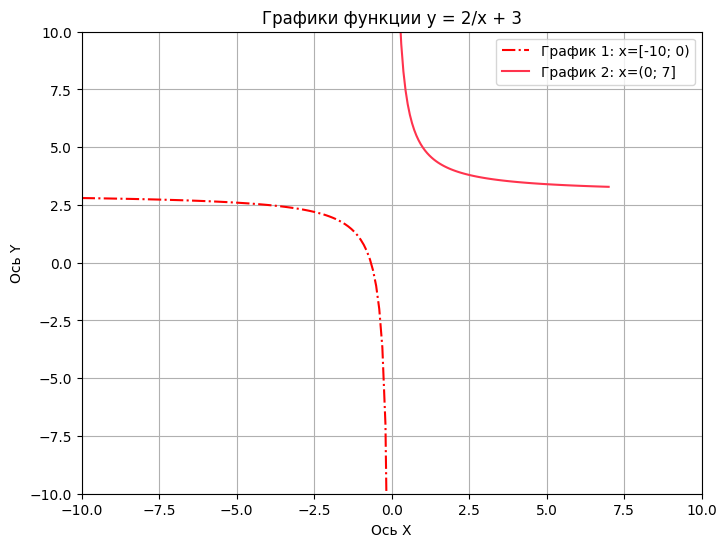

In [14]:
x1 = np.linspace(-10, -0.1, 100)
x2 = np.linspace(0.1, 7, 100)
y1 = 2 / x1 + 3
y2 = 2 / x2 + 3
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x1, y1, color='red', linestyle='-.', label='График 1: x=[-10; 0)')
ax.plot(x2, y2, color=(1.0, 0.2, 0.3), linestyle='-', label='График 2: x=(0; 7]')
#Пределы осей
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xlabel('Ось X')
ax.set_ylabel('Ось Y')
ax.set_title('Графики функции y = 2/x + 3')
ax.legend()
ax.grid(True)
plt.show()

**Задача 2**

Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

По оси X - возврат пассажира (Age)
По оси Y - стоимость билета (Fare)
Для выживших пассажиров используется маркер зеленый круг (Survived)
Для не выживших пассажиров используется маркер красный крест (Survived)
График должен подписи к осям и легенду и заголовок
Данные для которых не указан возврат или стоимость билета должны быть исключены

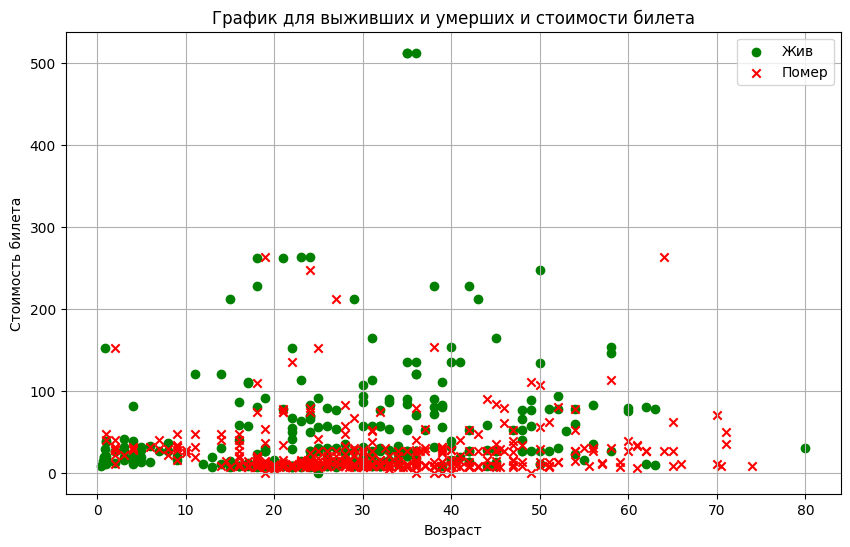

In [15]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df = titanic_df.dropna(subset=['Age', 'Fare'])
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('График для выживших и умерших и стоимости билета')
ax.set_xlabel('Возраст')
ax.set_ylabel('Стоимость билета')
survived = titanic_df[titanic_df['Survived'] == 1]
dead = titanic_df[titanic_df['Survived'] == 0]
ax.scatter(survived['Age'], survived['Fare'], color='green', marker='o', label='Жив')
ax.scatter(dead['Age'], dead['Fare'], color='red', marker='x', label='Помер')
ax.legend()
ax.grid(True)
plt.show()

**Задача 3**

Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы. Для набора данных iris постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')

Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
Цвет маркеров должен зависеть от вида ирисов (iris.target)
Графики должны иметь подписи к осям, легенду и общий заголовок

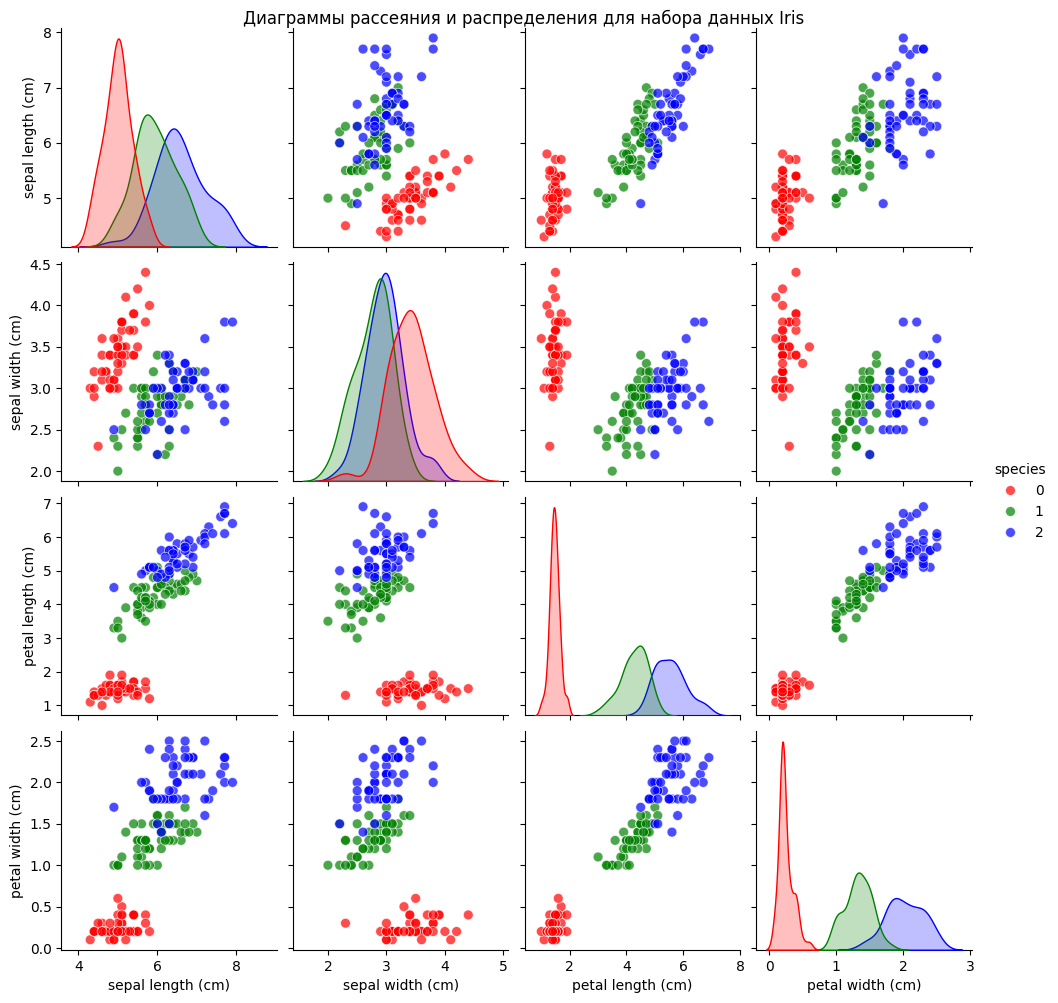

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target  # Колонка с целевым значением

sns.pairplot(data=iris_df, hue='species', palette={0: 'red', 1: 'green', 2: 'blue'}, plot_kws={'s': 50, 'alpha': 0.7})  # "hue" задаёт цвет маркеров по виду ирисов
plt.suptitle('Диаграммы рассеяния и распределения для набора данных Iris', y=1)
plt.show()

**Задача 4**

Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.
Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
График должен иметь подписи к осям, легенду и заголовок
Данные для которых не указан возраст или стоимость билета должны быть исключены

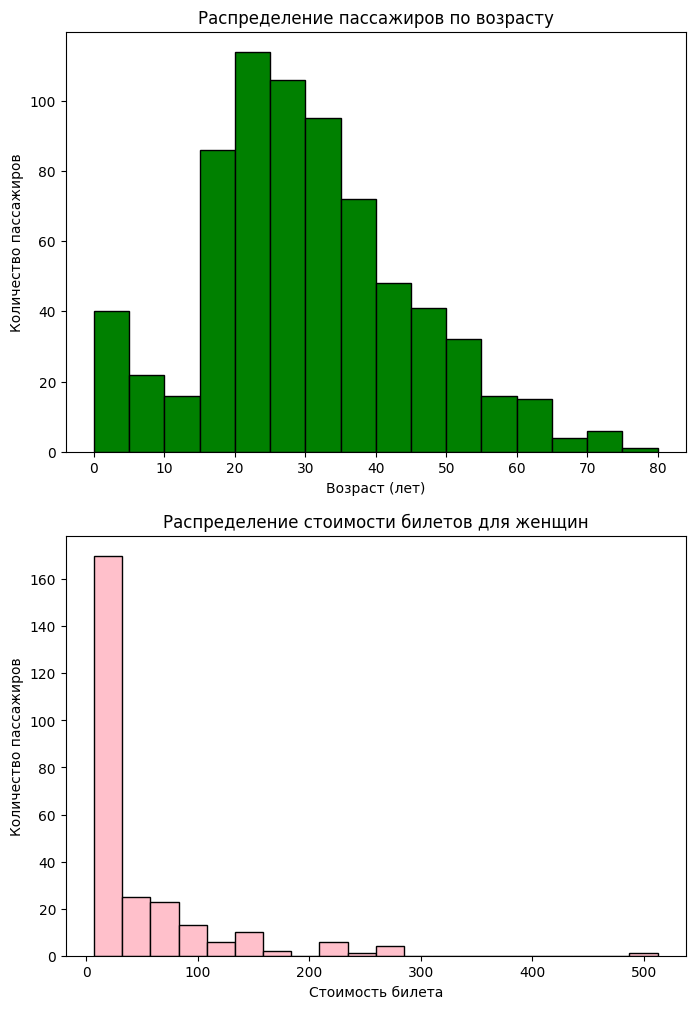

In [17]:
titanic_df = titanic_df.dropna(subset=['Age', 'Fare'])
fig, axes = plt.subplots(2, 1, figsize=(8, 12))
axes[0].hist(titanic_df['Age'], bins=range(0, 81, 5), color='green', edgecolor='black')
axes[0].set_title('Распределение пассажиров по возрасту')
axes[0].set_xlabel('Возраст (лет)')
axes[0].set_ylabel('Количество пассажиров')

female_fares = titanic_df[titanic_df['Sex'] == 'female']['Fare']
axes[1].hist(female_fares, bins=20, color='pink', edgecolor='black')
axes[1].set_title('Распределение стоимости билетов для женщин')
axes[1].set_xlabel('Стоимость билета')
axes[1].set_ylabel('Количество пассажиров')

plt.show()

**Задача 5**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

Диаграмма должна быть вертикальной
По оси X - класс каюты пассажира (Pclass)
По оси Y - средняя стоимость за проезд для данного класса (Fare)
График должен иметь подписи к осям, легенду и заголовок

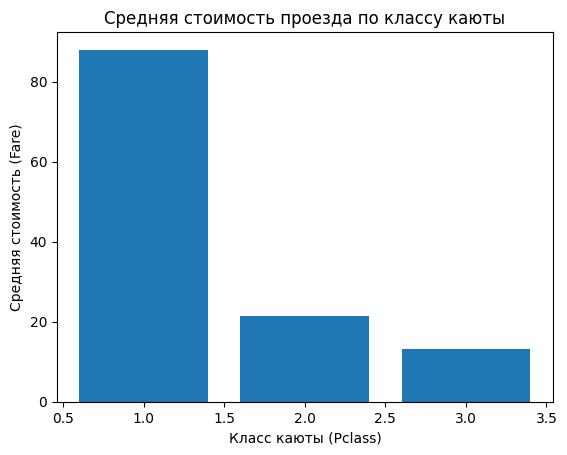

Pclass
1    87.961582
2    21.471556
3    13.229435
Name: Fare, dtype: float64


In [22]:
titanic_df = titanic_df.dropna(subset=['Pclass', 'Fare'])
avg_fare = titanic_df.groupby('Pclass')['Fare'].mean() # групировка по классам кают. Для каждого расчитывается средняя стоимость
plt.bar(avg_fare.index, avg_fare) # Класс кают / стоимость
plt.xlabel('Класс каюты (Pclass)')
plt.ylabel('Средняя стоимость (Fare)')
plt.title('Средняя стоимость проезда по классу каюты')
plt.show()
print(avg_fare)

**Задача 6**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

Диаграмма должна быть вертикальной
По оси X - класс каюты пассажира (Pclass)
По оси Y - количество пассажиров с разбивкой по полу (Sex)
График должен иметь подписи к осям, легенду и заголовок

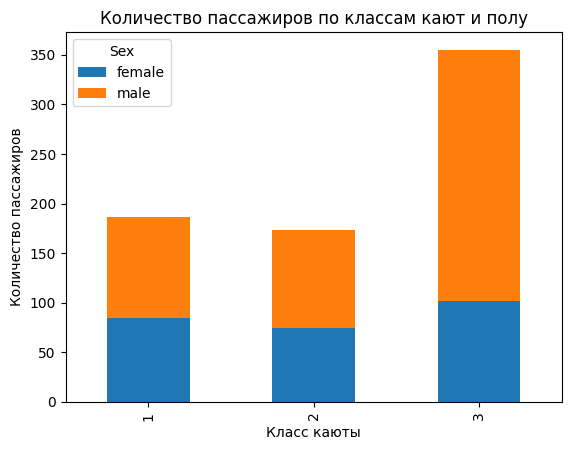

In [28]:
titanic_df = titanic_df.dropna(subset=['Pclass', 'Sex'])
passenger_counts = titanic_df.groupby(['Pclass', 'Sex']).size().unstack() #unstack() преобразует результат так, чтобы столбцы Pclass стали индексами, а значения по категориям Sex (мужчина/женщина) стали отдельными столбцами.
passenger_counts.plot(kind='bar', stacked=True)

plt.xlabel('Класс каюты')
plt.ylabel('Количество пассажиров')
plt.title('Количество пассажиров по классам кают и полу')
plt.legend(title='Sex')
plt.show()

**Задача 7**

Для набора данных iris постройте круговую диаграмму

Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе
Сектор с максимальной долей долен быть выдвинут
График должен иметь подписи к осям, легенду и заголовок

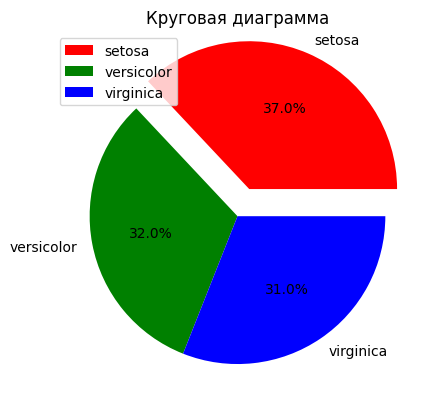

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()
target_series = pd.Series(iris.target) #0 для setosa, 1 versicolor, 2 virginica
freq_table = target_series.sample(100, random_state = 42).value_counts()
plt.pie(
    freq_table,
    labels=[iris.target_names[i] for i in freq_table.index],
    colors=["red", "green", "blue"],
    autopct="%.1f%%",
    explode=[0.2, 0, 0]
    )
plt.title("Круговая диаграмма")
plt.legend()
plt.show()

**Задача 8**

Использую библиотеку Seaborn постройте гистограмму для возраста пассажиров "Титаника"

<Axes: xlabel='Age', ylabel='Count'>

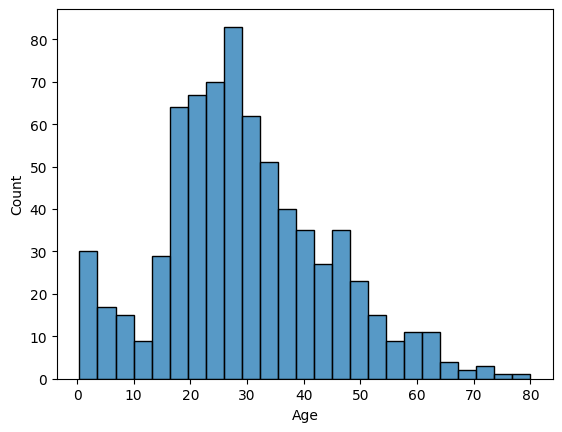

In [32]:
sns.histplot(titanic_df['Age'], bins = 25)